# Week 1.3: Multiple Class 
Author: Juana Karina Diaz Barba

In [41]:
import linecache
import json
from statistics import mean
import matplotlib.pyplot as plt
import time

# Step 1: Producing data
### 1a) from CSV to JSON

In [42]:
class CsvConverter:
    '''Class that converts a csv to a json file'''
    def __init__(self, header):
        self.key = header

    def csv_to_json(self, csv_lines):
        self.dict_list = []
        '''Receives a list of lines from a CSV-file and returns this data as JSON'''

        # Count the number of keys on the file
        key_len = (self.key.count(',') + 1)

        for line in (csv_lines):
            values = line.strip('\n').split(',')
            values_str = ','.join(values)

            # Count number of values per line
            values_len = (values_str.count(',')+1)
            assert key_len == values_len, f'Keys and values lengths do not match'

            dictionary = dict(zip(self.key.split(','),values_str.split(',')))
            self.dict_list.append(dictionary)

        json_file = self.dict_list
        return json_file



### 1b) Getting the data

In [43]:
class Reader:
    '''Read given CSV-files in strides of a certain amount of lines'''
    def __init__(self, input_file='./data/dSST.csv'):
        self.input_file = input_file
        # Get total number of lines on the file
        self.lines_number = sum(1 for line in open(input_file))
        self.line_from = 1 # setting the counter as 1
        header = self.get_header() 
        # Creating the instance of the class CsvConcerter
        self.converter_object = CsvConverter(header)

    def get_lines(self):
        line_to = self.line_from + 5
        # Return empty string if no more lines
        if self.line_from >= self.lines_number:
            return []

        data_subset = linecache.getlines(self.input_file)[self.line_from:line_to]
        self.line_from = line_to
        return self.converter_object.csv_to_json(data_subset)
    
    def get_header(self):
        header = linecache.getline(self.input_file,1).strip('\n').split(',')
        header_str = ','.join(header)
        return header_str
  

In [44]:
input_file = './data/dSST.csv'
reader_object = Reader(input_file)

test = reader_object.get_lines()
print(test)
print(reader_object.get_lines())
print(reader_object.get_lines())
print(reader_object.get_lines())


[{'Year': '1881', 'Jan': '-.18', 'Feb': '-.13', 'Mar': '.04', 'Apr': '.06', 'May': '.07', 'Jun': '-.17', 'Jul': '.02', 'Aug': '-.02', 'Sep': '-.14', 'Oct': '-.21', 'Nov': '-.17', 'Dec': '-.06', 'J-D': '-.07', 'D-N': '-.08', 'DJF': '-.16', 'MAM': '.06', 'JJA': '-.06', 'SON': '-.17'}, {'Year': '1882', 'Jan': '.17', 'Feb': '.15', 'Mar': '.05', 'Apr': '-.16', 'May': '-.13', 'Jun': '-.22', 'Jul': '-.15', 'Aug': '-.06', 'Sep': '-.13', 'Oct': '-.23', 'Nov': '-.15', 'Dec': '-.36', 'J-D': '-.10', 'D-N': '-.08', 'DJF': '.09', 'MAM': '-.08', 'JJA': '-.15', 'SON': '-.17'}, {'Year': '1883', 'Jan': '-.28', 'Feb': '-.36', 'Mar': '-.12', 'Apr': '-.18', 'May': '-.17', 'Jun': '-.06', 'Jul': '-.06', 'Aug': '-.13', 'Sep': '-.21', 'Oct': '-.11', 'Nov': '-.23', 'Dec': '-.11', 'J-D': '-.17', 'D-N': '-.19', 'DJF': '-.33', 'MAM': '-.15', 'JJA': '-.09', 'SON': '-.19'}, {'Year': '1884', 'Jan': '-.12', 'Feb': '-.07', 'Mar': '-.36', 'Apr': '-.39', 'May': '-.33', 'Jun': '-.34', 'Jul': '-.32', 'Aug': '-.27', 'Sep': 

## Step 2: Consuming the data

In [45]:
class AverageYear:
    '''Show the average temperature anomaly for the complete set of five years'''
    # Primary constructor
    def __init__(self, reader_object):
        self.file = reader_object.get_lines()
        self.months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    def average(self):
        years = []
        year_mean = []
        for year_data in self.file:
            years.append(year_data['Year'])
            # Get the average value per month. Do not taking into account the keys which are not months
            monthly_values = [eval(value) for key, value in year_data.items() if key in self.months]
            year_mean.append(mean(monthly_values))
        
        # plotting the results
        plt.figure(figsize=(4, 2))
        plt.bar(years, year_mean)
        plt.title('Estimate of global surface temperature change')
        plt.xlabel('Years')
        plt.ylabel('Temperatures')
        plt.xticks(fontsize=8, rotation=90) 
        plt.show()
        # Returns a list with the average temperatures per year
        return year_mean
 


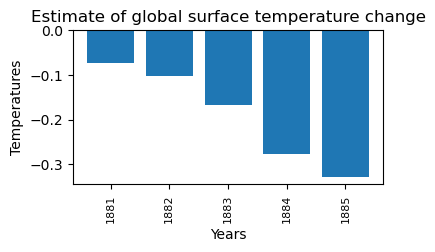

In [46]:
consumer1 = Reader('./data/dSST.csv')
year_temp = AverageYear(consumer1).average()

In [47]:
class AverageMonth:
    '''Show the average temperature anomaly for each month over the set of years'''
    # Primary constructor
    def __init__(self, reader_object):
        self.file = reader_object.get_lines()
        self.months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    def average(self):
        self.years = []
        self.month_mean = {month: [] for month in self.months}

        for year_data in self.file:
            self.years.append(year_data['Year'])
            
            # Collect the monthly temperature anomalies in a period of 5 years
            [self.month_mean[month].append(float(year_data[month])) 
            for month in self.months if month in year_data]

        # Calculate the mean per month
        monthly_means = {month: mean(temperatures) for month, temperatures 
                        in self.month_mean.items()}

        # Plotting the results
        plt.figure(figsize=(8, 4))
        plt.bar(monthly_means.keys(), monthly_means.values())
        plt.title(f'Average temperature anomaly per month. From {self.years[0]} to {self.years[-1]}')
        plt.xlabel('Months')
        plt.ylabel('Temperatures')
        plt.xticks(fontsize=10, rotation=90) 
        plt.show()
            
        # Returns a dictionary with the average temperatures per month
        return monthly_means


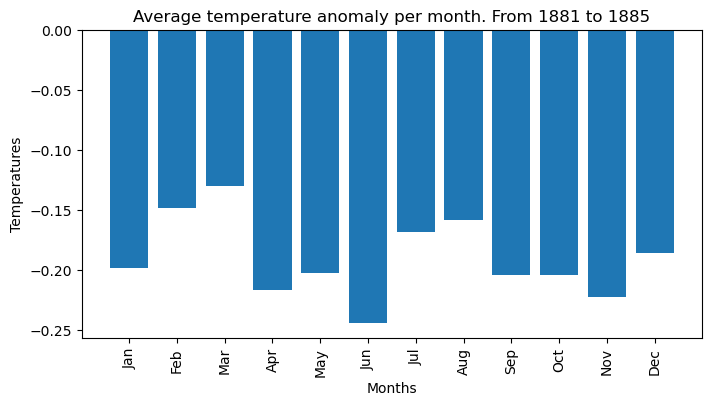

{'Jan': -0.19799999999999998,
 'Feb': -0.148,
 'Mar': -0.13,
 'Apr': -0.216,
 'May': -0.202,
 'Jun': -0.244,
 'Jul': -0.168,
 'Aug': -0.158,
 'Sep': -0.20400000000000001,
 'Oct': -0.20400000000000001,
 'Nov': -0.222,
 'Dec': -0.186}

In [48]:
consumer2 = Reader('./data/dSST.csv')
AverageMonth(consumer2).average()

----------------
# Step 3: The observer pattern
### 3a) Extending the reader

If we wanted to create separate files with extension ```.py``` the code lines from the following cell should be on that file
  
In this case the **File name:** swould be ```publisher.py```

In [51]:
class Reader:
    '''Read given CSV-files in strides of a certain amount of lines. 
    Observers can be added and removed with methods from this class'''
    def __init__(self, input_file='./data/dSST.csv'):
        self.input_file = input_file
        # Get total number of lines on the file
        self.lines_number = sum(1 for line in open(input_file))
        self.line_from = 1 # setting the counter as 1
        header = self.get_header() 
        # Creating the instance of the class CsvConcerter
        self.converter_object = CsvConverter(header)

        #Record of the consumers
        self.consumers = []

    def get_lines(self):
        line_to = self.line_from + 5

        # Return empty string if no more lines
        if self.line_from >= self.lines_number:
            return []
        data_subset = linecache.getlines(self.input_file)[self.line_from:line_to]
        self.line_from = line_to
        return self.converter_object.csv_to_json(data_subset)

    def produce_data(self):
        ''' Method that produces the data and notifies the observers'''
        data = self.get_lines() # Get lines object
        while len(data) != 0:
            print('Data produced:', data)
            self.notify_observers(data) # Notify the observers to update the data
            print('Sleeping for 5 seconds')
            time.sleep(5) # Sleep for 5 seconds
            data = self.get_lines()
    
    def get_header(self):
        header = linecache.getline(self.input_file,1).strip('\n').split(',')
        header_str = ','.join(header)
        return header_str
    
    def add_observer(self, other):
        if other not in self.consumers:
            self.consumers.append(other)

    def remove_observer(self, other):
        if other in self.consumers:
            self.consumers.remove(other)

    def notify_observers(self, other):
        '''Iterate over all the registered observers and call update on each of them'''
        print('Notifiying consumers...')
        [consumer.update(other) for consumer in self.consumers]


### 3b) Extending the consumers

Modifiying the classes ```AverageYear``` and ```AverageMonth```. 
Instead of making them responsible for the call to ```next_lines()```, we just let them react to the updates of the ```Reader``` - class.  

```self.file = reader_object.get_lines()``` is removed from the initializer of the classes, instead 
the __average__ method is changed to __update__ method. This method receives the json lines provided from the ```Reader``` class.


If we wanted to create separate files with extension ```.py``` the code lines from the following cell should be on that file, plus the commented lines.  
  
In this case the **File name:** swould be ```consumers.py```


In [52]:
class AverageYear:
    '''Show the average temperature anomaly for the complete set of five years'''
    # Primary constructor
    def __init__(self):
        self.months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    def update(self, lines_data):
        years = []
        year_mean = []
        for year_data in lines_data:
            years.append(year_data['Year'])
            # Get the average value per month. Do not taking into account the keys which are not months
            monthly_values = [eval(value) for key, value in year_data.items() if key in self.months]
            year_mean.append(mean(monthly_values))
        
        # plotting the results
        plt.figure(figsize=(4, 2))
        plt.bar(years, year_mean)
        plt.title('Estimate of global surface temperature change')
        plt.xlabel('Years')
        plt.ylabel('Temperatures')
        plt.xticks(fontsize=8, rotation=90) 
        plt.show()
        # Returns a list with the average temperatures per year
        return year_mean
    
class AverageMonth:
    '''Show the average temperature anomaly for each month over the set of years'''
    # Primary constructor
    def __init__(self):
        self.months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    def update(self, lines_data):
        self.years = []
        self.month_mean = {month: [] for month in self.months}

        for year_data in lines_data:
            self.years.append(year_data['Year'])
            
            # Collect the monthly temperature anomalies in a period of 5 years
            [self.month_mean[month].append(float(year_data[month])) 
            for month in self.months if month in year_data]

        # Calculate the mean per month
        monthly_means = {month: mean(temperatures) for month, temperatures 
                        in self.month_mean.items()}

        # Plotting the results
        plt.figure(figsize=(8, 4))
        plt.bar(monthly_means.keys(), monthly_means.values())
        plt.title(f'Average temperature anomaly per month. From {self.years[0]} to {self.years[-1]}')
        plt.xlabel('Months')
        plt.ylabel('Temperatures')
        plt.xticks(fontsize=10, rotation=90) 
        plt.show()
            
        # Returns a dictionary with the average temperatures per month
        return monthly_means

If we wanted to create separate files with extension ```.py``` the code lines from the following cell should be on that file, plus the commented lines.  
  
In this case the **File name:** swould be ```Main.py```


Data produced: [{'Year': '1881', 'Jan': '-.18', 'Feb': '-.13', 'Mar': '.04', 'Apr': '.06', 'May': '.07', 'Jun': '-.17', 'Jul': '.02', 'Aug': '-.02', 'Sep': '-.14', 'Oct': '-.21', 'Nov': '-.17', 'Dec': '-.06', 'J-D': '-.07', 'D-N': '-.08', 'DJF': '-.16', 'MAM': '.06', 'JJA': '-.06', 'SON': '-.17'}, {'Year': '1882', 'Jan': '.17', 'Feb': '.15', 'Mar': '.05', 'Apr': '-.16', 'May': '-.13', 'Jun': '-.22', 'Jul': '-.15', 'Aug': '-.06', 'Sep': '-.13', 'Oct': '-.23', 'Nov': '-.15', 'Dec': '-.36', 'J-D': '-.10', 'D-N': '-.08', 'DJF': '.09', 'MAM': '-.08', 'JJA': '-.15', 'SON': '-.17'}, {'Year': '1883', 'Jan': '-.28', 'Feb': '-.36', 'Mar': '-.12', 'Apr': '-.18', 'May': '-.17', 'Jun': '-.06', 'Jul': '-.06', 'Aug': '-.13', 'Sep': '-.21', 'Oct': '-.11', 'Nov': '-.23', 'Dec': '-.11', 'J-D': '-.17', 'D-N': '-.19', 'DJF': '-.33', 'MAM': '-.15', 'JJA': '-.09', 'SON': '-.19'}, {'Year': '1884', 'Jan': '-.12', 'Feb': '-.07', 'Mar': '-.36', 'Apr': '-.39', 'May': '-.33', 'Jun': '-.34', 'Jul': '-.32', 'Aug': 

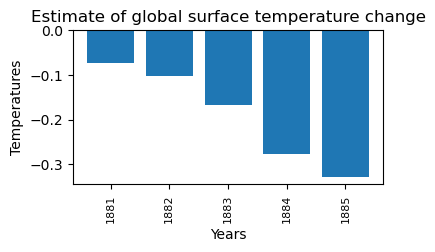

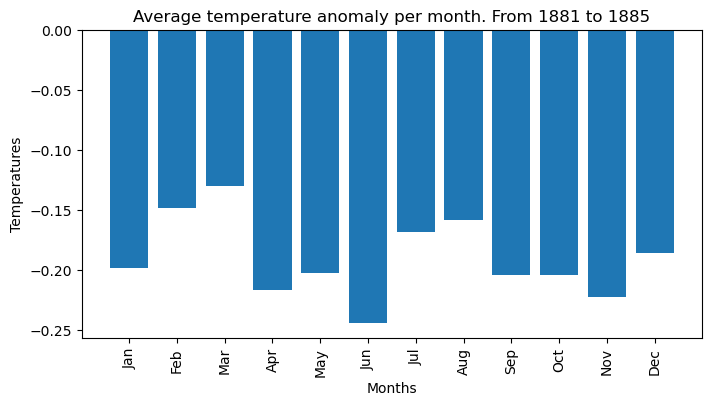

Sleeping for 5 seconds
Data produced: [{'Year': '1886', 'Jan': '-.43', 'Feb': '-.50', 'Mar': '-.43', 'Apr': '-.28', 'May': '-.24', 'Jun': '-.34', 'Jul': '-.18', 'Aug': '-.30', 'Sep': '-.23', 'Oct': '-.27', 'Nov': '-.27', 'Dec': '-.25', 'J-D': '-.31', 'D-N': '-.30', 'DJF': '-.34', 'MAM': '-.31', 'JJA': '-.27', 'SON': '-.26'}, {'Year': '1887', 'Jan': '-.71', 'Feb': '-.56', 'Mar': '-.35', 'Apr': '-.34', 'May': '-.30', 'Jun': '-.24', 'Jul': '-.25', 'Aug': '-.35', 'Sep': '-.25', 'Oct': '-.35', 'Nov': '-.26', 'Dec': '-.32', 'J-D': '-.36', 'D-N': '-.35', 'DJF': '-.51', 'MAM': '-.33', 'JJA': '-.28', 'SON': '-.29'}, {'Year': '1888', 'Jan': '-.33', 'Feb': '-.35', 'Mar': '-.41', 'Apr': '-.20', 'May': '-.21', 'Jun': '-.17', 'Jul': '-.10', 'Aug': '-.15', 'Sep': '-.11', 'Oct': '.02', 'Nov': '.03', 'Dec': '-.03', 'J-D': '-.17', 'D-N': '-.19', 'DJF': '-.34', 'MAM': '-.27', 'JJA': '-.14', 'SON': '-.02'}, {'Year': '1889', 'Jan': '-.08', 'Feb': '.17', 'Mar': '.07', 'Apr': '.10', 'May': '.00', 'Jun': '-.0

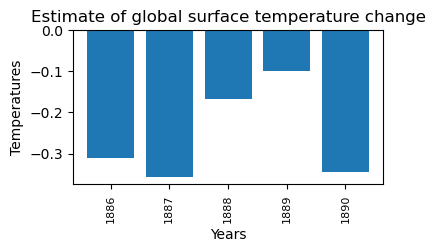

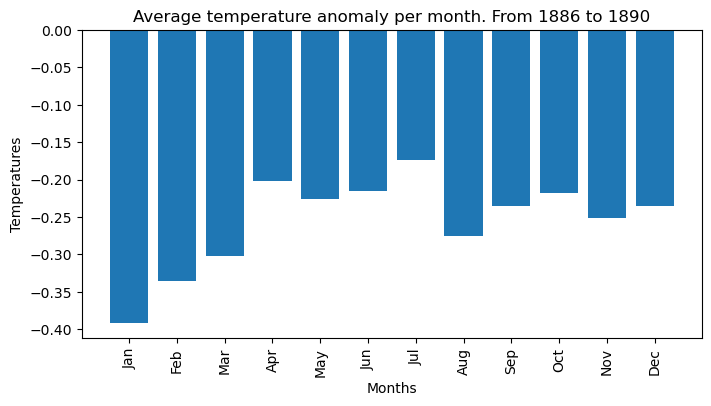

Sleeping for 5 seconds
Data produced: [{'Year': '1891', 'Jan': '-.33', 'Feb': '-.46', 'Mar': '-.18', 'Apr': '-.27', 'May': '-.16', 'Jun': '-.20', 'Jul': '-.17', 'Aug': '-.17', 'Sep': '-.15', 'Oct': '-.21', 'Nov': '-.31', 'Dec': '-.04', 'J-D': '-.22', 'D-N': '-.24', 'DJF': '-.37', 'MAM': '-.20', 'JJA': '-.18', 'SON': '-.22'}, {'Year': '1892', 'Jan': '-.28', 'Feb': '-.10', 'Mar': '-.40', 'Apr': '-.33', 'May': '-.23', 'Jun': '-.22', 'Jul': '-.31', 'Aug': '-.27', 'Sep': '-.16', 'Oct': '-.14', 'Nov': '-.41', 'Dec': '-.38', 'J-D': '-.27', 'D-N': '-.24', 'DJF': '-.14', 'MAM': '-.32', 'JJA': '-.27', 'SON': '-.24'}, {'Year': '1893', 'Jan': '-.81', 'Feb': '-.56', 'Mar': '-.22', 'Apr': '-.27', 'May': '-.33', 'Jun': '-.25', 'Jul': '-.14', 'Aug': '-.24', 'Sep': '-.22', 'Oct': '-.18', 'Nov': '-.18', 'Dec': '-.31', 'J-D': '-.31', 'D-N': '-.32', 'DJF': '-.58', 'MAM': '-.27', 'JJA': '-.21', 'SON': '-.19'}, {'Year': '1894', 'Jan': '-.52', 'Feb': '-.28', 'Mar': '-.23', 'Apr': '-.44', 'May': '-.30', 'Jun'

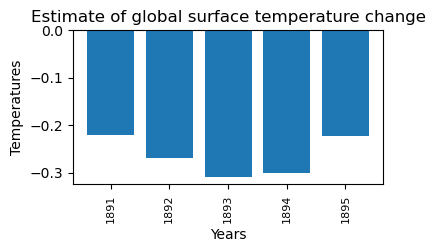

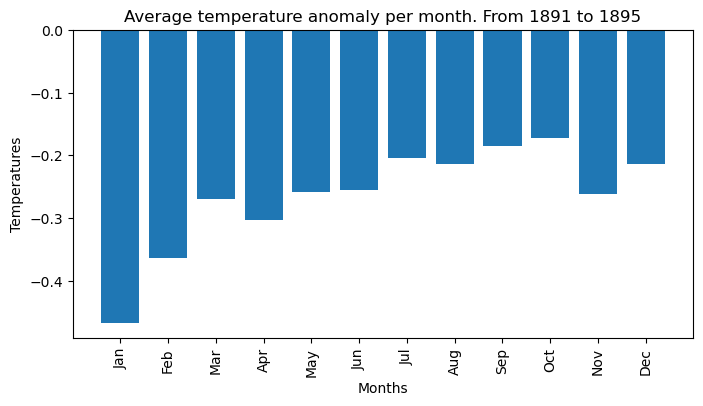

Sleeping for 5 seconds
Data produced: [{'Year': '1896', 'Jan': '-.21', 'Feb': '-.12', 'Mar': '-.26', 'Apr': '-.30', 'May': '-.15', 'Jun': '-.11', 'Jul': '-.02', 'Aug': '-.05', 'Sep': '-.07', 'Oct': '.07', 'Nov': '-.04', 'Dec': '-.04', 'J-D': '-.11', 'D-N': '-.12', 'DJF': '-.16', 'MAM': '-.24', 'JJA': '-.06', 'SON': '-.01'}, {'Year': '1897', 'Jan': '-.15', 'Feb': '-.16', 'Mar': '-.13', 'Apr': '-.02', 'May': '-.01', 'Jun': '-.11', 'Jul': '-.02', 'Aug': '-.09', 'Sep': '-.08', 'Oct': '-.13', 'Nov': '-.17', 'Dec': '-.20', 'J-D': '-.11', 'D-N': '-.09', 'DJF': '-.12', 'MAM': '-.05', 'JJA': '-.08', 'SON': '-.13'}, {'Year': '1898', 'Jan': '-.02', 'Feb': '-.29', 'Mar': '-.51', 'Apr': '-.30', 'May': '-.30', 'Jun': '-.19', 'Jul': '-.22', 'Aug': '-.27', 'Sep': '-.21', 'Oct': '-.34', 'Nov': '-.38', 'Dec': '-.23', 'J-D': '-.27', 'D-N': '-.27', 'DJF': '-.17', 'MAM': '-.37', 'JJA': '-.22', 'SON': '-.31'}, {'Year': '1899', 'Jan': '-.16', 'Feb': '-.38', 'Mar': '-.36', 'Apr': '-.20', 'May': '-.23', 'Jun':

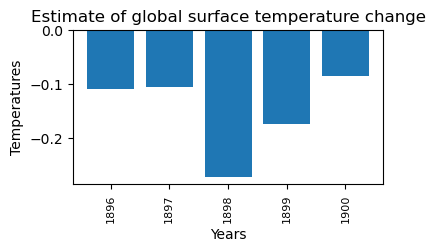

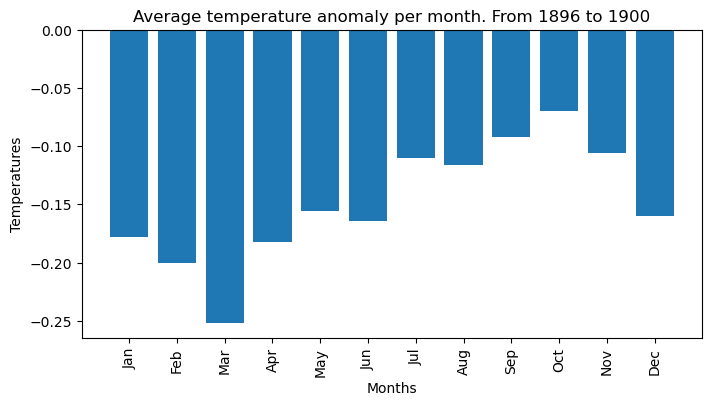

Sleeping for 5 seconds
Data produced: [{'Year': '1901', 'Jan': '-.22', 'Feb': '-.11', 'Mar': '.06', 'Apr': '-.02', 'May': '-.15', 'Jun': '-.12', 'Jul': '-.14', 'Aug': '-.20', 'Sep': '-.22', 'Oct': '-.29', 'Nov': '-.18', 'Dec': '-.27', 'J-D': '-.16', 'D-N': '-.14', 'DJF': '-.13', 'MAM': '-.04', 'JJA': '-.16', 'SON': '-.23'}, {'Year': '1902', 'Jan': '-.17', 'Feb': '-.07', 'Mar': '-.28', 'Apr': '-.28', 'May': '-.32', 'Jun': '-.30', 'Jul': '-.28', 'Aug': '-.30', 'Sep': '-.29', 'Oct': '-.28', 'Nov': '-.35', 'Dec': '-.41', 'J-D': '-.28', 'D-N': '-.27', 'DJF': '-.17', 'MAM': '-.29', 'JJA': '-.29', 'SON': '-.31'}, {'Year': '1903', 'Jan': '-.23', 'Feb': '-.05', 'Mar': '-.22', 'Apr': '-.41', 'May': '-.39', 'Jun': '-.42', 'Jul': '-.35', 'Aug': '-.45', 'Sep': '-.50', 'Oct': '-.48', 'Nov': '-.42', 'Dec': '-.51', 'J-D': '-.37', 'D-N': '-.36', 'DJF': '-.23', 'MAM': '-.34', 'JJA': '-.41', 'SON': '-.47'}, {'Year': '1904', 'Jan': '-.63', 'Feb': '-.57', 'Mar': '-.48', 'Apr': '-.50', 'May': '-.51', 'Jun':

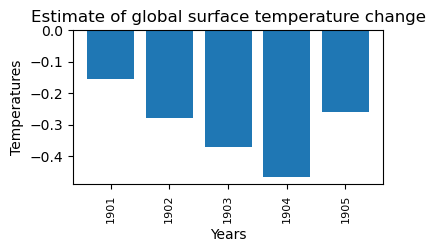

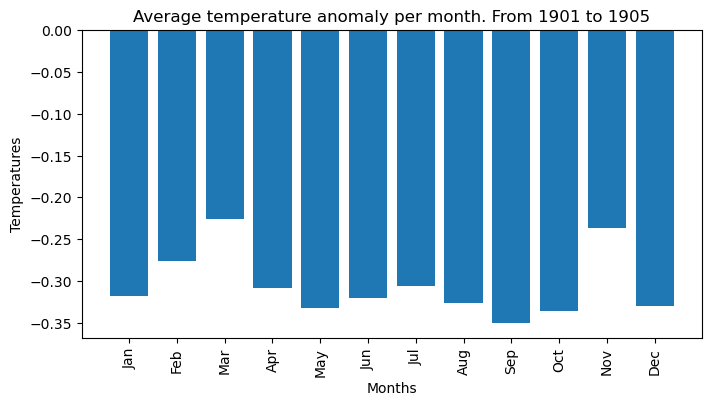

Sleeping for 5 seconds
Data produced: [{'Year': '1906', 'Jan': '-.27', 'Feb': '-.29', 'Mar': '-.18', 'Apr': '-.04', 'May': '-.25', 'Jun': '-.19', 'Jul': '-.23', 'Aug': '-.20', 'Sep': '-.28', 'Oct': '-.20', 'Nov': '-.37', 'Dec': '-.14', 'J-D': '-.22', 'D-N': '-.22', 'DJF': '-.23', 'MAM': '-.16', 'JJA': '-.20', 'SON': '-.28'}, {'Year': '1907', 'Jan': '-.43', 'Feb': '-.51', 'Mar': '-.27', 'Apr': '-.36', 'May': '-.46', 'Jun': '-.42', 'Jul': '-.35', 'Aug': '-.34', 'Sep': '-.34', 'Oct': '-.22', 'Nov': '-.46', 'Dec': '-.46', 'J-D': '-.38', 'D-N': '-.36', 'DJF': '-.36', 'MAM': '-.36', 'JJA': '-.37', 'SON': '-.34'}, {'Year': '1908', 'Jan': '-.44', 'Feb': '-.32', 'Mar': '-.55', 'Apr': '-.44', 'May': '-.37', 'Jun': '-.38', 'Jul': '-.35', 'Aug': '-.46', 'Sep': '-.36', 'Oct': '-.44', 'Nov': '-.51', 'Dec': '-.48', 'J-D': '-.42', 'D-N': '-.42', 'DJF': '-.41', 'MAM': '-.45', 'JJA': '-.40', 'SON': '-.43'}, {'Year': '1909', 'Jan': '-.72', 'Feb': '-.45', 'Mar': '-.54', 'Apr': '-.58', 'May': '-.54', 'Jun'

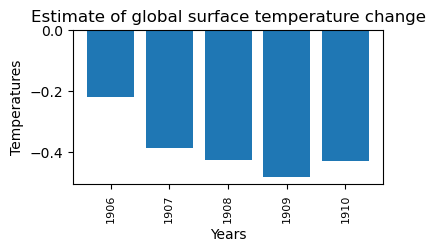

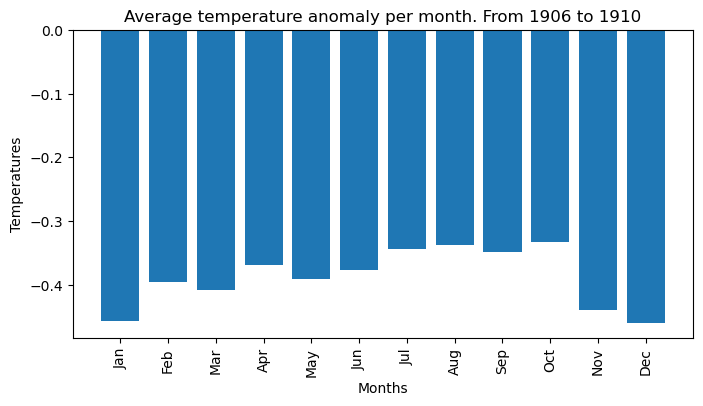

Sleeping for 5 seconds
Data produced: [{'Year': '1911', 'Jan': '-.62', 'Feb': '-.57', 'Mar': '-.61', 'Apr': '-.53', 'May': '-.51', 'Jun': '-.50', 'Jul': '-.41', 'Aug': '-.43', 'Sep': '-.40', 'Oct': '-.26', 'Nov': '-.20', 'Dec': '-.21', 'J-D': '-.44', 'D-N': '-.47', 'DJF': '-.62', 'MAM': '-.55', 'JJA': '-.45', 'SON': '-.29'}, {'Year': '1912', 'Jan': '-.24', 'Feb': '-.13', 'Mar': '-.37', 'Apr': '-.17', 'May': '-.20', 'Jun': '-.23', 'Jul': '-.42', 'Aug': '-.54', 'Sep': '-.58', 'Oct': '-.57', 'Nov': '-.38', 'Dec': '-.42', 'J-D': '-.36', 'D-N': '-.34', 'DJF': '-.19', 'MAM': '-.25', 'JJA': '-.40', 'SON': '-.51'}, {'Year': '1913', 'Jan': '-.40', 'Feb': '-.44', 'Mar': '-.42', 'Apr': '-.39', 'May': '-.43', 'Jun': '-.45', 'Jul': '-.36', 'Aug': '-.34', 'Sep': '-.34', 'Oct': '-.32', 'Nov': '-.19', 'Dec': '-.02', 'J-D': '-.34', 'D-N': '-.38', 'DJF': '-.42', 'MAM': '-.41', 'JJA': '-.38', 'SON': '-.29'}, {'Year': '1914', 'Jan': '.05', 'Feb': '-.09', 'Mar': '-.24', 'Apr': '-.29', 'May': '-.21', 'Jun':

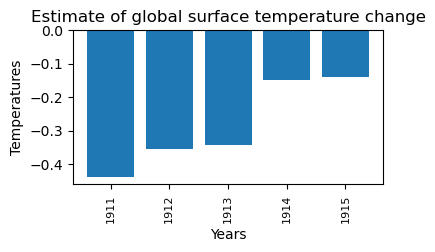

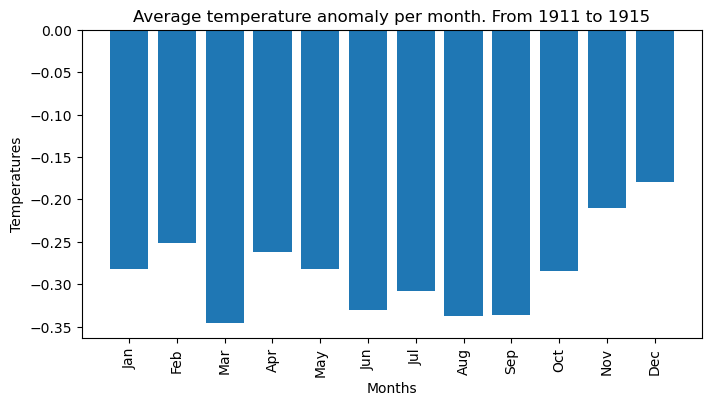

Sleeping for 5 seconds
Data produced: [{'Year': '1916', 'Jan': '-.12', 'Feb': '-.14', 'Mar': '-.28', 'Apr': '-.30', 'May': '-.34', 'Jun': '-.49', 'Jul': '-.37', 'Aug': '-.28', 'Sep': '-.36', 'Oct': '-.33', 'Nov': '-.46', 'Dec': '-.81', 'J-D': '-.36', 'D-N': '-.31', 'DJF': '-.16', 'MAM': '-.31', 'JJA': '-.38', 'SON': '-.38'}, {'Year': '1917', 'Jan': '-.57', 'Feb': '-.63', 'Mar': '-.63', 'Apr': '-.54', 'May': '-.55', 'Jun': '-.43', 'Jul': '-.25', 'Aug': '-.22', 'Sep': '-.23', 'Oct': '-.44', 'Nov': '-.33', 'Dec': '-.67', 'J-D': '-.46', 'D-N': '-.47', 'DJF': '-.67', 'MAM': '-.58', 'JJA': '-.30', 'SON': '-.33'}, {'Year': '1918', 'Jan': '-.47', 'Feb': '-.33', 'Mar': '-.24', 'Apr': '-.44', 'May': '-.42', 'Jun': '-.36', 'Jul': '-.32', 'Aug': '-.32', 'Sep': '-.17', 'Oct': '-.06', 'Nov': '-.11', 'Dec': '-.29', 'J-D': '-.30', 'D-N': '-.33', 'DJF': '-.49', 'MAM': '-.37', 'JJA': '-.33', 'SON': '-.12'}, {'Year': '1919', 'Jan': '-.20', 'Feb': '-.24', 'Mar': '-.21', 'Apr': '-.12', 'May': '-.28', 'Jun'

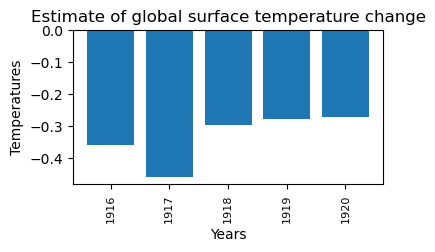

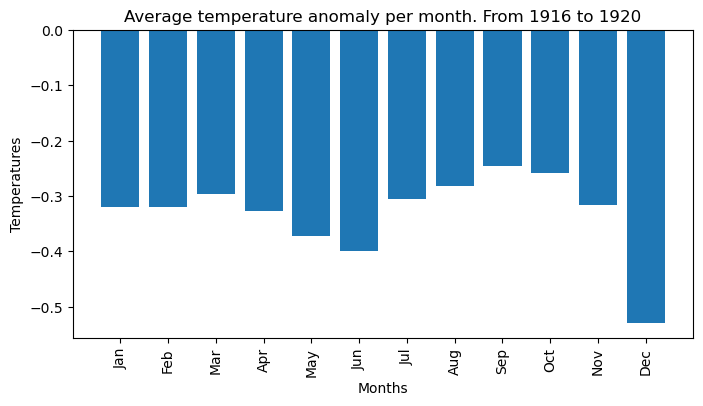

Sleeping for 5 seconds
Data produced: [{'Year': '1921', 'Jan': '-.04', 'Feb': '-.17', 'Mar': '-.23', 'Apr': '-.30', 'May': '-.30', 'Jun': '-.27', 'Jul': '-.15', 'Aug': '-.26', 'Sep': '-.19', 'Oct': '-.03', 'Nov': '-.13', 'Dec': '-.18', 'J-D': '-.19', 'D-N': '-.21', 'DJF': '-.23', 'MAM': '-.28', 'JJA': '-.23', 'SON': '-.12'}, {'Year': '1922', 'Jan': '-.33', 'Feb': '-.44', 'Mar': '-.15', 'Apr': '-.23', 'May': '-.34', 'Jun': '-.31', 'Jul': '-.28', 'Aug': '-.33', 'Sep': '-.36', 'Oct': '-.33', 'Nov': '-.15', 'Dec': '-.19', 'J-D': '-.29', 'D-N': '-.28', 'DJF': '-.32', 'MAM': '-.24', 'JJA': '-.30', 'SON': '-.28'}, {'Year': '1923', 'Jan': '-.28', 'Feb': '-.39', 'Mar': '-.34', 'Apr': '-.41', 'May': '-.34', 'Jun': '-.30', 'Jul': '-.31', 'Aug': '-.33', 'Sep': '-.31', 'Oct': '-.14', 'Nov': '-.02', 'Dec': '-.05', 'J-D': '-.27', 'D-N': '-.28', 'DJF': '-.29', 'MAM': '-.36', 'JJA': '-.31', 'SON': '-.16'}, {'Year': '1924', 'Jan': '-.23', 'Feb': '-.24', 'Mar': '-.08', 'Apr': '-.31', 'May': '-.18', 'Jun'

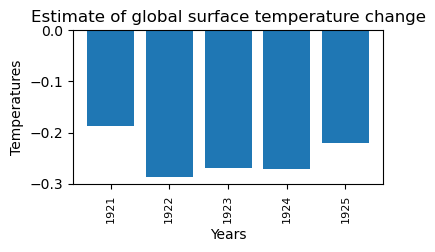

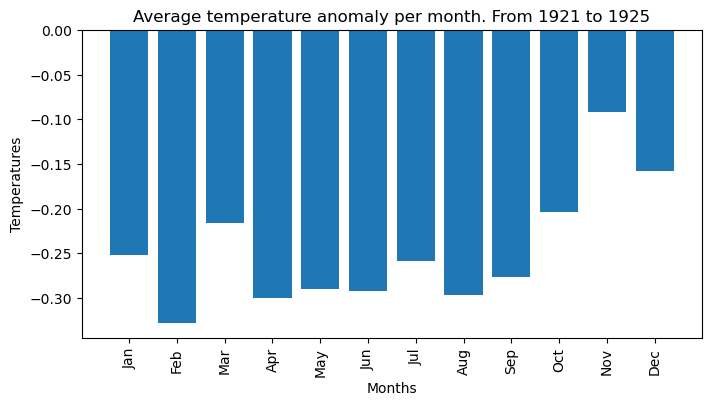

Sleeping for 5 seconds
Data produced: [{'Year': '1926', 'Jan': '.20', 'Feb': '.03', 'Mar': '.11', 'Apr': '-.12', 'May': '-.23', 'Jun': '-.26', 'Jul': '-.28', 'Aug': '-.13', 'Sep': '-.14', 'Oct': '-.11', 'Nov': '-.06', 'Dec': '-.29', 'J-D': '-.11', 'D-N': '-.08', 'DJF': '.10', 'MAM': '-.08', 'JJA': '-.22', 'SON': '-.11'}, {'Year': '1927', 'Jan': '-.27', 'Feb': '-.18', 'Mar': '-.38', 'Apr': '-.30', 'May': '-.25', 'Jun': '-.27', 'Jul': '-.18', 'Aug': '-.24', 'Sep': '-.13', 'Oct': '-.01', 'Nov': '-.05', 'Dec': '-.33', 'J-D': '-.22', 'D-N': '-.21', 'DJF': '-.25', 'MAM': '-.31', 'JJA': '-.23', 'SON': '-.06'}, {'Year': '1928', 'Jan': '-.02', 'Feb': '-.09', 'Mar': '-.25', 'Apr': '-.28', 'May': '-.30', 'Jun': '-.39', 'Jul': '-.19', 'Aug': '-.23', 'Sep': '-.22', 'Oct': '-.19', 'Nov': '-.09', 'Dec': '-.17', 'J-D': '-.20', 'D-N': '-.22', 'DJF': '-.15', 'MAM': '-.28', 'JJA': '-.27', 'SON': '-.17'}, {'Year': '1929', 'Jan': '-.45', 'Feb': '-.59', 'Mar': '-.32', 'Apr': '-.42', 'May': '-.38', 'Jun': '-

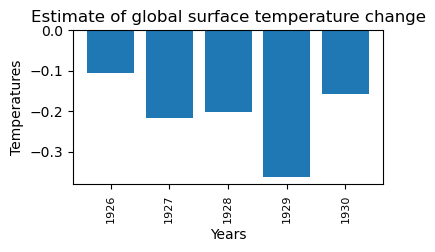

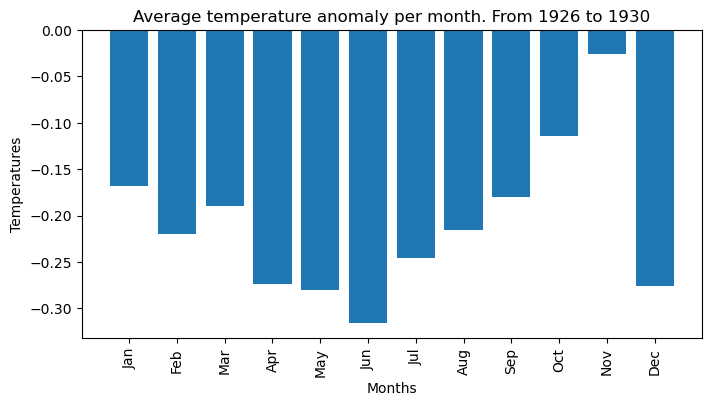

Sleeping for 5 seconds
Data produced: [{'Year': '1931', 'Jan': '-.10', 'Feb': '-.21', 'Mar': '-.10', 'Apr': '-.22', 'May': '-.19', 'Jun': '-.08', 'Jul': '-.04', 'Aug': '-.04', 'Sep': '-.07', 'Oct': '.05', 'Nov': '-.06', 'Dec': '-.05', 'J-D': '-.09', 'D-N': '-.09', 'DJF': '-.12', 'MAM': '-.17', 'JJA': '-.05', 'SON': '-.02'}, {'Year': '1932', 'Jan': '.15', 'Feb': '-.17', 'Mar': '-.18', 'Apr': '-.06', 'May': '-.17', 'Jun': '-.29', 'Jul': '-.24', 'Aug': '-.22', 'Sep': '-.10', 'Oct': '-.09', 'Nov': '-.27', 'Dec': '-.26', 'J-D': '-.16', 'D-N': '-.14', 'DJF': '-.02', 'MAM': '-.14', 'JJA': '-.25', 'SON': '-.15'}, {'Year': '1933', 'Jan': '-.23', 'Feb': '-.29', 'Mar': '-.29', 'Apr': '-.24', 'May': '-.29', 'Jun': '-.34', 'Jul': '-.21', 'Aug': '-.24', 'Sep': '-.29', 'Oct': '-.25', 'Nov': '-.30', 'Dec': '-.44', 'J-D': '-.29', 'D-N': '-.27', 'DJF': '-.26', 'MAM': '-.27', 'JJA': '-.26', 'SON': '-.28'}, {'Year': '1934', 'Jan': '-.21', 'Feb': '-.02', 'Mar': '-.29', 'Apr': '-.30', 'May': '-.09', 'Jun': 

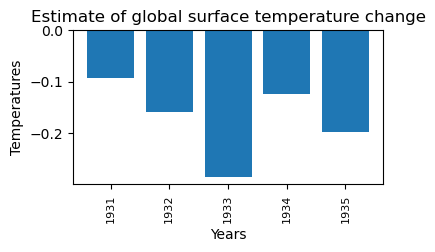

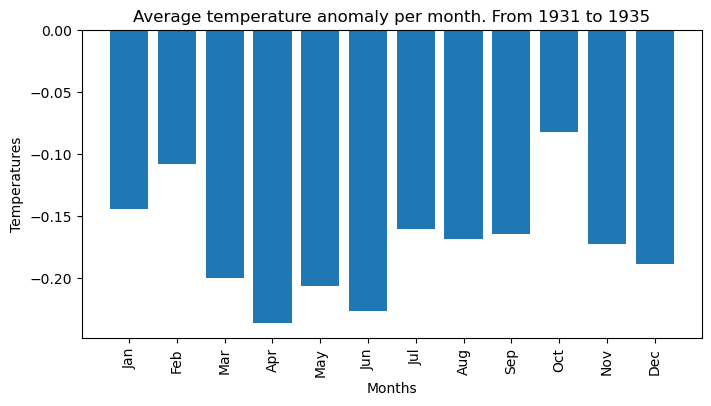

Sleeping for 5 seconds
Data produced: [{'Year': '1936', 'Jan': '-.27', 'Feb': '-.38', 'Mar': '-.21', 'Apr': '-.20', 'May': '-.16', 'Jun': '-.22', 'Jul': '-.10', 'Aug': '-.13', 'Sep': '-.09', 'Oct': '-.03', 'Nov': '.02', 'Dec': '-.01', 'J-D': '-.15', 'D-N': '-.16', 'DJF': '-.27', 'MAM': '-.19', 'JJA': '-.15', 'SON': '-.03'}, {'Year': '1937', 'Jan': '-.07', 'Feb': '.03', 'Mar': '-.20', 'Apr': '-.16', 'May': '-.05', 'Jun': '-.05', 'Jul': '-.03', 'Aug': '.01', 'Sep': '.09', 'Oct': '.09', 'Nov': '.08', 'Dec': '-.07', 'J-D': '-.03', 'D-N': '-.02', 'DJF': '-.01', 'MAM': '-.14', 'JJA': '-.02', 'SON': '.09'}, {'Year': '1938', 'Jan': '.08', 'Feb': '.03', 'Mar': '.09', 'Apr': '.06', 'May': '-.09', 'Jun': '-.17', 'Jul': '-.09', 'Aug': '-.05', 'Sep': '.01', 'Oct': '.15', 'Nov': '.08', 'Dec': '-.13', 'J-D': '.00', 'D-N': '.00', 'DJF': '.01', 'MAM': '.02', 'JJA': '-.11', 'SON': '.08'}, {'Year': '1939', 'Jan': '-.05', 'Feb': '-.06', 'Mar': '-.17', 'Apr': '-.09', 'May': '-.04', 'Jun': '-.07', 'Jul': '-

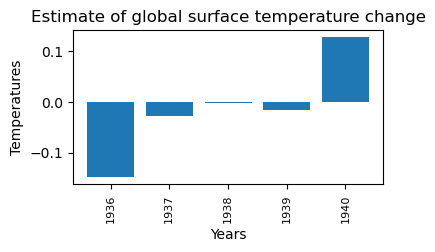

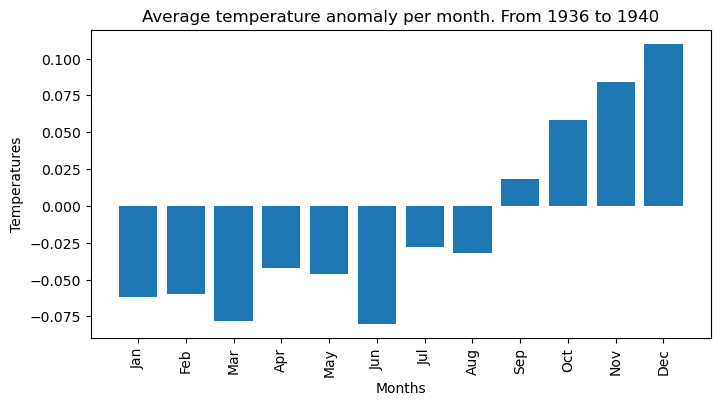

Sleeping for 5 seconds
Data produced: [{'Year': '1941', 'Jan': '.18', 'Feb': '.31', 'Mar': '.10', 'Apr': '.16', 'May': '.17', 'Jun': '.13', 'Jul': '.22', 'Aug': '.15', 'Sep': '.02', 'Oct': '.35', 'Nov': '.23', 'Dec': '.22', 'J-D': '.19', 'D-N': '.19', 'DJF': '.27', 'MAM': '.14', 'JJA': '.16', 'SON': '.20'}, {'Year': '1942', 'Jan': '.30', 'Feb': '.03', 'Mar': '.05', 'Apr': '.10', 'May': '.11', 'Jun': '.05', 'Jul': '.01', 'Aug': '-.04', 'Sep': '-.03', 'Oct': '.02', 'Nov': '.10', 'Dec': '.13', 'J-D': '.07', 'D-N': '.08', 'DJF': '.18', 'MAM': '.09', 'JJA': '.01', 'SON': '.03'}, {'Year': '1943', 'Jan': '-.01', 'Feb': '.18', 'Mar': '-.03', 'Apr': '.11', 'May': '.07', 'Jun': '-.05', 'Jul': '.09', 'Aug': '.01', 'Sep': '.05', 'Oct': '.23', 'Nov': '.20', 'Dec': '.24', 'J-D': '.09', 'D-N': '.08', 'DJF': '.10', 'MAM': '.05', 'JJA': '.01', 'SON': '.16'}, {'Year': '1944', 'Jan': '.36', 'Feb': '.25', 'Mar': '.26', 'Apr': '.19', 'May': '.19', 'Jun': '.15', 'Jul': '.18', 'Aug': '.18', 'Sep': '.28', 'Oc

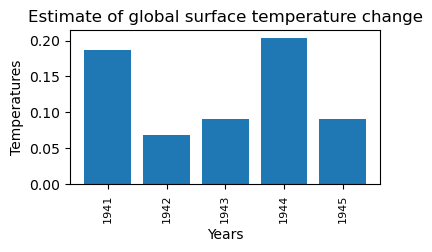

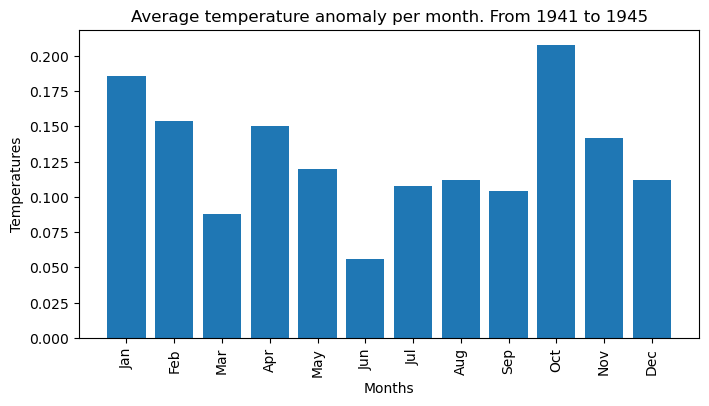

Sleeping for 5 seconds
Data produced: [{'Year': '1946', 'Jan': '.15', 'Feb': '.02', 'Mar': '.01', 'Apr': '.05', 'May': '-.07', 'Jun': '-.21', 'Jul': '-.12', 'Aug': '-.20', 'Sep': '-.08', 'Oct': '-.08', 'Nov': '-.05', 'Dec': '-.31', 'J-D': '-.07', 'D-N': '-.05', 'DJF': '.03', 'MAM': '.00', 'JJA': '-.18', 'SON': '-.07'}, {'Year': '1947', 'Jan': '-.06', 'Feb': '-.08', 'Mar': '.06', 'Apr': '.06', 'May': '-.02', 'Jun': '-.02', 'Jul': '-.04', 'Aug': '-.07', 'Sep': '-.13', 'Oct': '.07', 'Nov': '.03', 'Dec': '-.14', 'J-D': '-.03', 'D-N': '-.04', 'DJF': '-.15', 'MAM': '.03', 'JJA': '-.05', 'SON': '-.01'}, {'Year': '1948', 'Jan': '.06', 'Feb': '-.15', 'Mar': '-.24', 'Apr': '-.12', 'May': '-.01', 'Jun': '-.05', 'Jul': '-.11', 'Aug': '-.12', 'Sep': '-.15', 'Oct': '-.05', 'Nov': '-.13', 'Dec': '-.24', 'J-D': '-.11', 'D-N': '-.10', 'DJF': '-.07', 'MAM': '-.12', 'JJA': '-.10', 'SON': '-.11'}, {'Year': '1949', 'Jan': '.06', 'Feb': '-.14', 'Mar': '-.02', 'Apr': '-.11', 'May': '-.10', 'Jun': '-.27', 'Ju

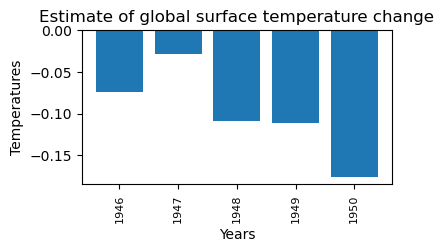

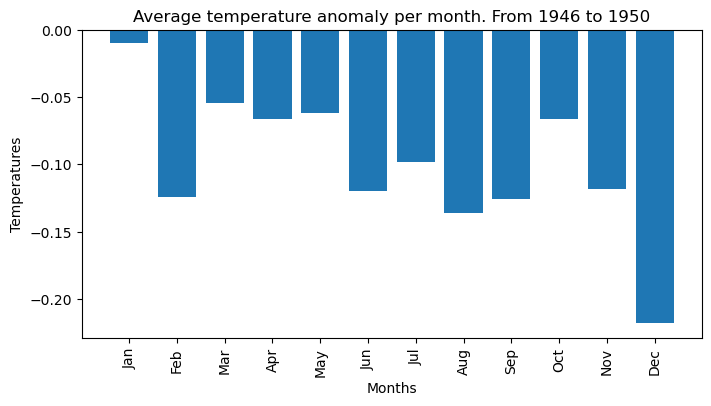

Sleeping for 5 seconds
Data produced: [{'Year': '1951', 'Jan': '-.34', 'Feb': '-.42', 'Mar': '-.20', 'Apr': '-.14', 'May': '.00', 'Jun': '-.07', 'Jul': '-.01', 'Aug': '.06', 'Sep': '.05', 'Oct': '.08', 'Nov': '-.01', 'Dec': '.16', 'J-D': '-.07', 'D-N': '-.10', 'DJF': '-.33', 'MAM': '-.12', 'JJA': '-.01', 'SON': '.04'}, {'Year': '1952', 'Jan': '.11', 'Feb': '.11', 'Mar': '-.08', 'Apr': '.03', 'May': '-.03', 'Jun': '-.03', 'Jul': '.04', 'Aug': '.05', 'Sep': '.07', 'Oct': '.00', 'Nov': '-.13', 'Dec': '-.02', 'J-D': '.01', 'D-N': '.03', 'DJF': '.13', 'MAM': '-.03', 'JJA': '.02', 'SON': '-.02'}, {'Year': '1953', 'Jan': '.07', 'Feb': '.15', 'Mar': '.11', 'Apr': '.19', 'May': '.11', 'Jun': '.11', 'Jul': '.01', 'Aug': '.05', 'Sep': '.04', 'Oct': '.08', 'Nov': '-.03', 'Dec': '.05', 'J-D': '.08', 'D-N': '.07', 'DJF': '.07', 'MAM': '.14', 'JJA': '.06', 'SON': '.03'}, {'Year': '1954', 'Jan': '-.24', 'Feb': '-.10', 'Mar': '-.15', 'Apr': '-.14', 'May': '-.20', 'Jun': '-.19', 'Jul': '-.19', 'Aug': '-

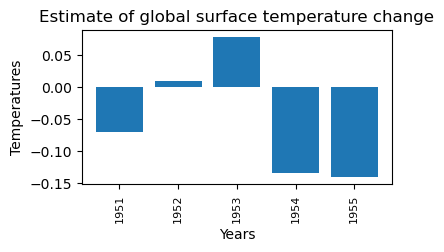

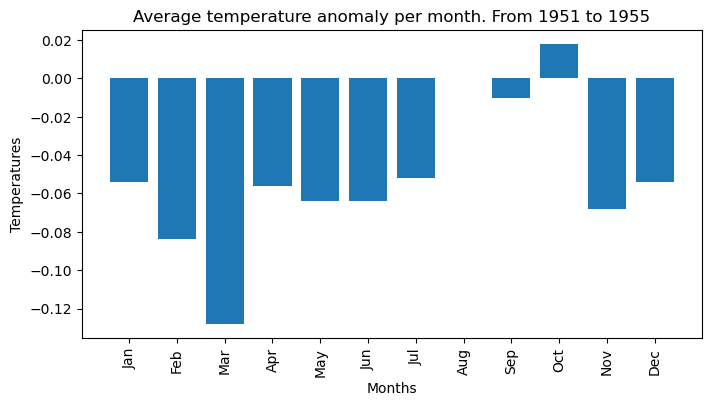

Sleeping for 5 seconds
Data produced: [{'Year': '1956', 'Jan': '-.13', 'Feb': '-.24', 'Mar': '-.21', 'Apr': '-.28', 'May': '-.29', 'Jun': '-.16', 'Jul': '-.09', 'Aug': '-.26', 'Sep': '-.19', 'Oct': '-.23', 'Nov': '-.15', 'Dec': '-.06', 'J-D': '-.19', 'D-N': '-.21', 'DJF': '-.22', 'MAM': '-.26', 'JJA': '-.17', 'SON': '-.19'}, {'Year': '1957', 'Jan': '-.09', 'Feb': '-.03', 'Mar': '-.05', 'Apr': '.00', 'May': '.09', 'Jun': '.16', 'Jul': '.02', 'Aug': '.15', 'Sep': '.09', 'Oct': '.01', 'Nov': '.08', 'Dec': '.15', 'J-D': '.05', 'D-N': '.03', 'DJF': '-.06', 'MAM': '.01', 'JJA': '.11', 'SON': '.06'}, {'Year': '1958', 'Jan': '.39', 'Feb': '.22', 'Mar': '.08', 'Apr': '.01', 'May': '.06', 'Jun': '-.09', 'Jul': '.05', 'Aug': '-.05', 'Sep': '-.02', 'Oct': '.04', 'Nov': '.02', 'Dec': '.01', 'J-D': '.06', 'D-N': '.07', 'DJF': '.25', 'MAM': '.05', 'JJA': '-.03', 'SON': '.01'}, {'Year': '1959', 'Jan': '.08', 'Feb': '.07', 'Mar': '.18', 'Apr': '.15', 'May': '.04', 'Jun': '.03', 'Jul': '.03', 'Aug': '-.

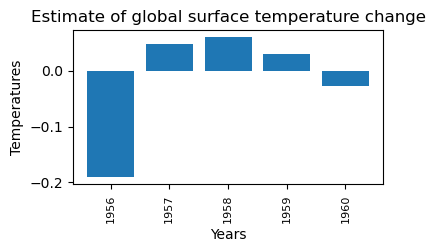

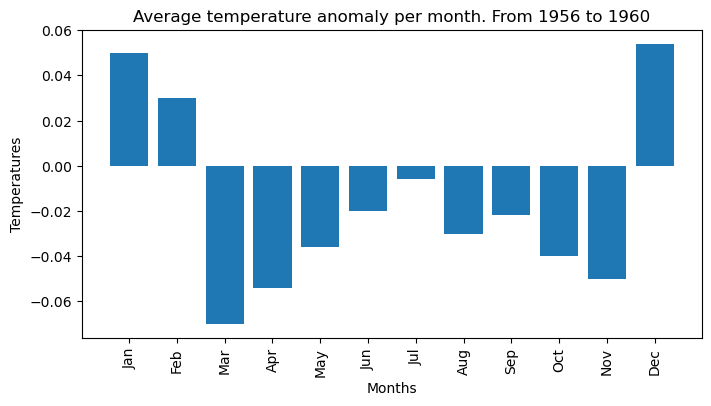

Sleeping for 5 seconds
Data produced: [{'Year': '1961', 'Jan': '.07', 'Feb': '.19', 'Mar': '.09', 'Apr': '.13', 'May': '.12', 'Jun': '.11', 'Jul': '.01', 'Aug': '.01', 'Sep': '.09', 'Oct': '.00', 'Nov': '.03', 'Dec': '-.16', 'J-D': '.06', 'D-N': '.09', 'DJF': '.15', 'MAM': '.11', 'JJA': '.04', 'SON': '.04'}, {'Year': '1962', 'Jan': '.05', 'Feb': '.15', 'Mar': '.10', 'Apr': '.05', 'May': '-.06', 'Jun': '.03', 'Jul': '.02', 'Aug': '-.01', 'Sep': '.00', 'Oct': '.01', 'Nov': '.06', 'Dec': '-.03', 'J-D': '.03', 'D-N': '.02', 'DJF': '.01', 'MAM': '.03', 'JJA': '.01', 'SON': '.02'}, {'Year': '1963', 'Jan': '-.03', 'Feb': '.18', 'Mar': '-.14', 'Apr': '-.07', 'May': '-.06', 'Jun': '.05', 'Jul': '.06', 'Aug': '.22', 'Sep': '.18', 'Oct': '.14', 'Nov': '.15', 'Dec': '-.03', 'J-D': '.05', 'D-N': '.05', 'DJF': '.04', 'MAM': '-.09', 'JJA': '.11', 'SON': '.16'}, {'Year': '1964', 'Jan': '-.09', 'Feb': '-.10', 'Mar': '-.22', 'Apr': '-.32', 'May': '-.25', 'Jun': '-.04', 'Jul': '-.04', 'Aug': '-.22', 'Sep

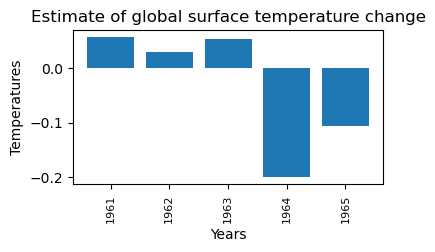

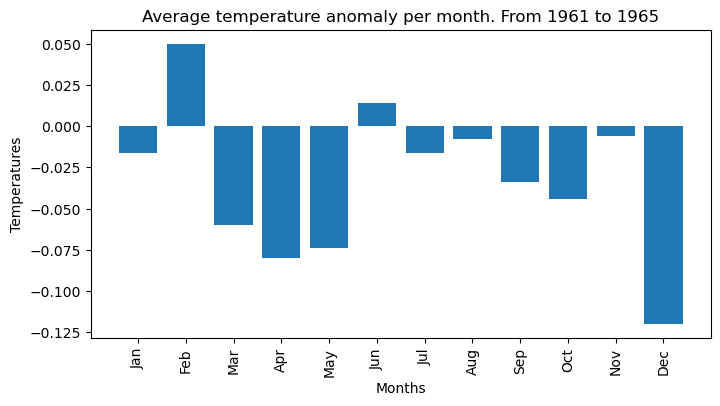

Sleeping for 5 seconds
Data produced: [{'Year': '1966', 'Jan': '-.19', 'Feb': '-.05', 'Mar': '.03', 'Apr': '-.13', 'May': '-.12', 'Jun': '.01', 'Jul': '.08', 'Aug': '-.09', 'Sep': '-.03', 'Oct': '-.17', 'Nov': '-.01', 'Dec': '-.03', 'J-D': '-.06', 'D-N': '-.06', 'DJF': '-.11', 'MAM': '-.07', 'JJA': '.00', 'SON': '-.07'}, {'Year': '1967', 'Jan': '-.07', 'Feb': '-.21', 'Mar': '.05', 'Apr': '-.05', 'May': '.12', 'Jun': '-.08', 'Jul': '.02', 'Aug': '.01', 'Sep': '-.06', 'Oct': '.09', 'Nov': '-.05', 'Dec': '-.05', 'J-D': '-.02', 'D-N': '-.02', 'DJF': '-.10', 'MAM': '.04', 'JJA': '-.02', 'SON': '-.01'}, {'Year': '1968', 'Jan': '-.25', 'Feb': '-.14', 'Mar': '.20', 'Apr': '-.06', 'May': '-.14', 'Jun': '-.09', 'Jul': '-.13', 'Aug': '-.09', 'Sep': '-.19', 'Oct': '.09', 'Nov': '-.05', 'Dec': '-.15', 'J-D': '-.08', 'D-N': '-.08', 'DJF': '-.15', 'MAM': '.00', 'JJA': '-.10', 'SON': '-.05'}, {'Year': '1969', 'Jan': '-.11', 'Feb': '-.18', 'Mar': '.01', 'Apr': '.17', 'May': '.18', 'Jun': '.03', 'Jul': 

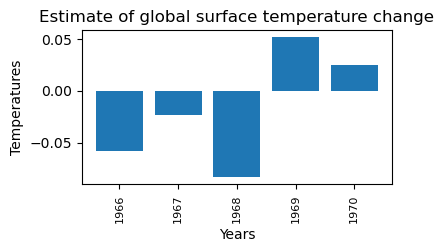

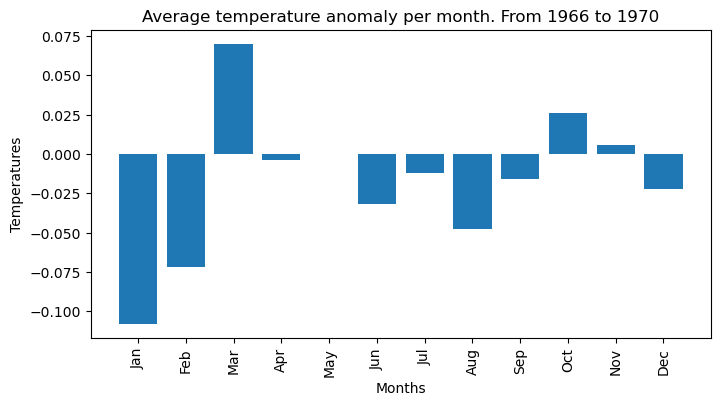

Sleeping for 5 seconds
Data produced: [{'Year': '1971', 'Jan': '-.02', 'Feb': '-.16', 'Mar': '-.18', 'Apr': '-.07', 'May': '-.05', 'Jun': '-.17', 'Jul': '-.08', 'Aug': '-.01', 'Sep': '-.06', 'Oct': '-.04', 'Nov': '-.07', 'Dec': '-.08', 'J-D': '-.08', 'D-N': '-.09', 'DJF': '-.10', 'MAM': '-.10', 'JJA': '-.08', 'SON': '-.06'}, {'Year': '1972', 'Jan': '-.22', 'Feb': '-.18', 'Mar': '.02', 'Apr': '.00', 'May': '-.03', 'Jun': '.04', 'Jul': '.01', 'Aug': '.16', 'Sep': '.02', 'Oct': '.08', 'Nov': '.02', 'Dec': '.18', 'J-D': '.01', 'D-N': '-.01', 'DJF': '-.16', 'MAM': '.00', 'JJA': '.07', 'SON': '.04'}, {'Year': '1973', 'Jan': '.29', 'Feb': '.32', 'Mar': '.29', 'Apr': '.27', 'May': '.23', 'Jun': '.19', 'Jul': '.13', 'Aug': '.05', 'Sep': '.09', 'Oct': '.10', 'Nov': '.05', 'Dec': '-.07', 'J-D': '.16', 'D-N': '.18', 'DJF': '.26', 'MAM': '.26', 'JJA': '.12', 'SON': '.08'}, {'Year': '1974', 'Jan': '-.10', 'Feb': '-.27', 'Mar': '-.05', 'Apr': '-.11', 'May': '-.04', 'Jun': '-.05', 'Jul': '-.03', 'Aug'

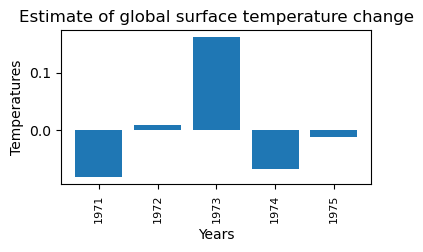

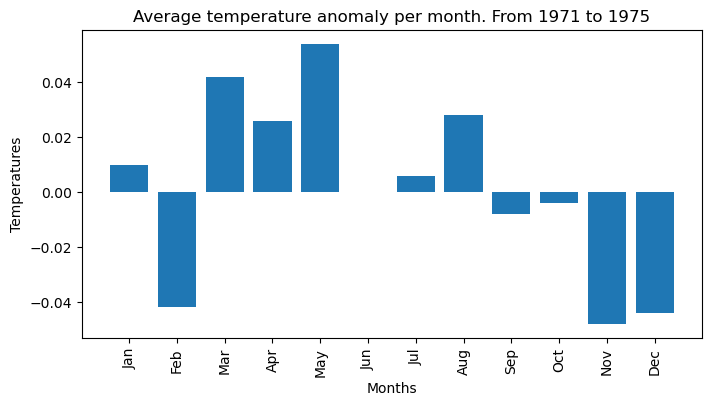

Sleeping for 5 seconds
Data produced: [{'Year': '1976', 'Jan': '-.03', 'Feb': '-.06', 'Mar': '-.21', 'Apr': '-.07', 'May': '-.20', 'Jun': '-.12', 'Jul': '-.10', 'Aug': '-.12', 'Sep': '-.06', 'Oct': '-.24', 'Nov': '-.06', 'Dec': '.11', 'J-D': '-.10', 'D-N': '-.12', 'DJF': '-.08', 'MAM': '-.16', 'JJA': '-.11', 'SON': '-.12'}, {'Year': '1977', 'Jan': '.18', 'Feb': '.23', 'Mar': '.25', 'Apr': '.27', 'May': '.33', 'Jun': '.27', 'Jul': '.20', 'Aug': '.18', 'Sep': '.02', 'Oct': '.04', 'Nov': '.16', 'Dec': '.03', 'J-D': '.18', 'D-N': '.19', 'DJF': '.17', 'MAM': '.28', 'JJA': '.22', 'SON': '.07'}, {'Year': '1978', 'Jan': '.07', 'Feb': '.10', 'Mar': '.19', 'Apr': '.17', 'May': '.09', 'Jun': '-.01', 'Jul': '.04', 'Aug': '-.13', 'Sep': '.06', 'Oct': '.03', 'Nov': '.14', 'Dec': '.08', 'J-D': '.07', 'D-N': '.07', 'DJF': '.07', 'MAM': '.15', 'JJA': '-.03', 'SON': '.08'}, {'Year': '1979', 'Jan': '.08', 'Feb': '-.10', 'Mar': '.19', 'Apr': '.15', 'May': '.04', 'Jun': '.14', 'Jul': '.04', 'Aug': '.17', '

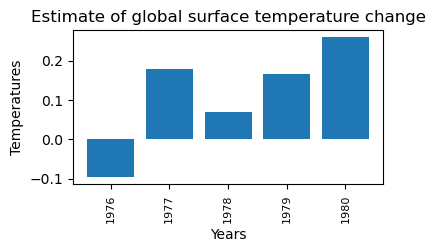

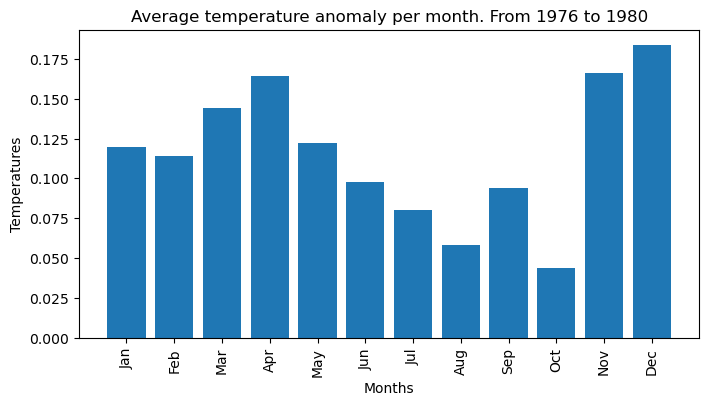

Sleeping for 5 seconds
Data produced: [{'Year': '1981', 'Jan': '.53', 'Feb': '.43', 'Mar': '.48', 'Apr': '.33', 'May': '.25', 'Jun': '.29', 'Jul': '.33', 'Aug': '.35', 'Sep': '.15', 'Oct': '.12', 'Nov': '.23', 'Dec': '.41', 'J-D': '.32', 'D-N': '.31', 'DJF': '.39', 'MAM': '.35', 'JJA': '.32', 'SON': '.17'}, {'Year': '1982', 'Jan': '.05', 'Feb': '.16', 'Mar': '.03', 'Apr': '.15', 'May': '.18', 'Jun': '.06', 'Jul': '.15', 'Aug': '.04', 'Sep': '.14', 'Oct': '.13', 'Nov': '.18', 'Dec': '.43', 'J-D': '.14', 'D-N': '.14', 'DJF': '.21', 'MAM': '.12', 'JJA': '.08', 'SON': '.15'}, {'Year': '1983', 'Jan': '.53', 'Feb': '.43', 'Mar': '.42', 'Apr': '.28', 'May': '.34', 'Jun': '.23', 'Jul': '.18', 'Aug': '.36', 'Sep': '.37', 'Oct': '.17', 'Nov': '.30', 'Dec': '.17', 'J-D': '.31', 'D-N': '.34', 'DJF': '.46', 'MAM': '.34', 'JJA': '.25', 'SON': '.28'}, {'Year': '1984', 'Jan': '.31', 'Feb': '.14', 'Mar': '.26', 'Apr': '.06', 'May': '.33', 'Jun': '.02', 'Jul': '.19', 'Aug': '.20', 'Sep': '.21', 'Oct': '

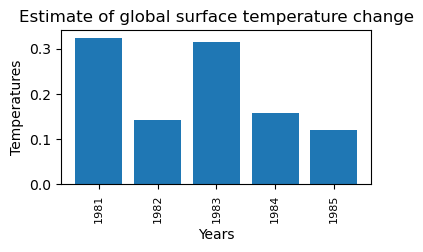

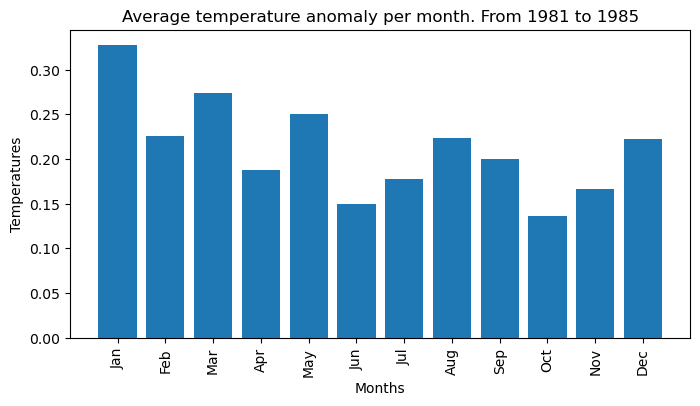

Sleeping for 5 seconds
Data produced: [{'Year': '1986', 'Jan': '.26', 'Feb': '.37', 'Mar': '.30', 'Apr': '.22', 'May': '.21', 'Jun': '.12', 'Jul': '.11', 'Aug': '.16', 'Sep': '.03', 'Oct': '.16', 'Nov': '.10', 'Dec': '.13', 'J-D': '.18', 'D-N': '.18', 'DJF': '.26', 'MAM': '.25', 'JJA': '.13', 'SON': '.10'}, {'Year': '1987', 'Jan': '.32', 'Feb': '.43', 'Mar': '.19', 'Apr': '.25', 'May': '.26', 'Jun': '.35', 'Jul': '.41', 'Aug': '.25', 'Sep': '.36', 'Oct': '.33', 'Nov': '.29', 'Dec': '.46', 'J-D': '.32', 'D-N': '.30', 'DJF': '.29', 'MAM': '.23', 'JJA': '.33', 'SON': '.32'}, {'Year': '1988', 'Jan': '.57', 'Feb': '.44', 'Mar': '.52', 'Apr': '.43', 'May': '.44', 'Jun': '.40', 'Jul': '.33', 'Aug': '.39', 'Sep': '.37', 'Oct': '.38', 'Nov': '.12', 'Dec': '.29', 'J-D': '.39', 'D-N': '.40', 'DJF': '.49', 'MAM': '.46', 'JJA': '.38', 'SON': '.29'}, {'Year': '1989', 'Jan': '.13', 'Feb': '.30', 'Mar': '.36', 'Apr': '.29', 'May': '.18', 'Jun': '.15', 'Jul': '.34', 'Aug': '.33', 'Sep': '.34', 'Oct': '

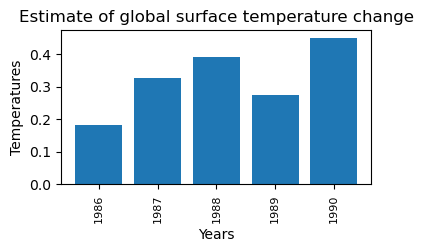

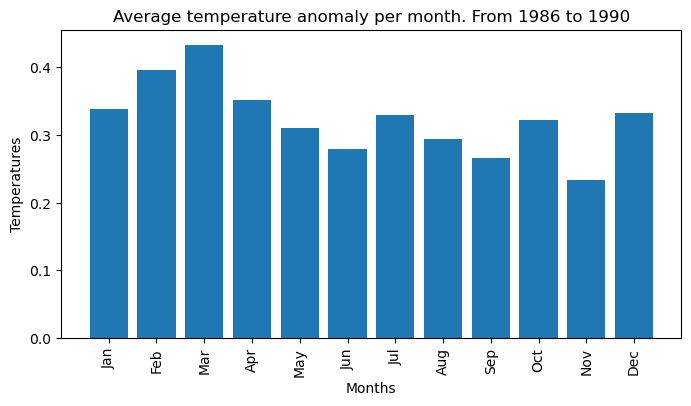

Sleeping for 5 seconds
Data produced: [{'Year': '1991', 'Jan': '.43', 'Feb': '.50', 'Mar': '.36', 'Apr': '.51', 'May': '.34', 'Jun': '.53', 'Jul': '.47', 'Aug': '.39', 'Sep': '.44', 'Oct': '.29', 'Nov': '.30', 'Dec': '.32', 'J-D': '.41', 'D-N': '.41', 'DJF': '.44', 'MAM': '.40', 'JJA': '.47', 'SON': '.34'}, {'Year': '1992', 'Jan': '.48', 'Feb': '.40', 'Mar': '.48', 'Apr': '.27', 'May': '.31', 'Jun': '.26', 'Jul': '.09', 'Aug': '.08', 'Sep': '-.01', 'Oct': '.06', 'Nov': '.03', 'Dec': '.21', 'J-D': '.22', 'D-N': '.23', 'DJF': '.40', 'MAM': '.36', 'JJA': '.14', 'SON': '.03'}, {'Year': '1993', 'Jan': '.35', 'Feb': '.37', 'Mar': '.36', 'Apr': '.28', 'May': '.29', 'Jun': '.23', 'Jul': '.25', 'Aug': '.11', 'Sep': '.12', 'Oct': '.23', 'Nov': '.04', 'Dec': '.18', 'J-D': '.23', 'D-N': '.24', 'DJF': '.31', 'MAM': '.31', 'JJA': '.20', 'SON': '.13'}, {'Year': '1994', 'Jan': '.26', 'Feb': '.03', 'Mar': '.29', 'Apr': '.42', 'May': '.28', 'Jun': '.44', 'Jul': '.30', 'Aug': '.22', 'Sep': '.32', 'Oct': 

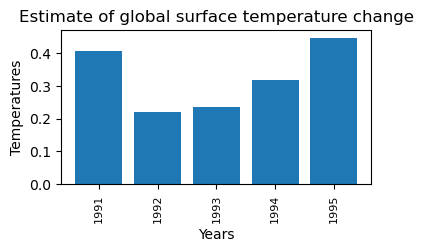

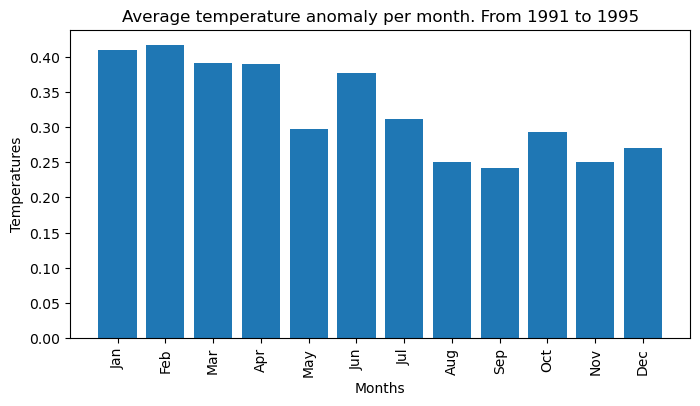

Sleeping for 5 seconds
Data produced: [{'Year': '1996', 'Jan': '.24', 'Feb': '.46', 'Mar': '.33', 'Apr': '.32', 'May': '.28', 'Jun': '.25', 'Jul': '.37', 'Aug': '.49', 'Sep': '.25', 'Oct': '.20', 'Nov': '.39', 'Dec': '.37', 'J-D': '.33', 'D-N': '.32', 'DJF': '.32', 'MAM': '.31', 'JJA': '.37', 'SON': '.28'}, {'Year': '1997', 'Jan': '.30', 'Feb': '.41', 'Mar': '.52', 'Apr': '.34', 'May': '.34', 'Jun': '.54', 'Jul': '.33', 'Aug': '.42', 'Sep': '.52', 'Oct': '.61', 'Nov': '.64', 'Dec': '.59', 'J-D': '.46', 'D-N': '.44', 'DJF': '.36', 'MAM': '.40', 'JJA': '.43', 'SON': '.59'}, {'Year': '1998', 'Jan': '.59', 'Feb': '.88', 'Mar': '.63', 'Apr': '.63', 'May': '.68', 'Jun': '.77', 'Jul': '.66', 'Aug': '.65', 'Sep': '.42', 'Oct': '.41', 'Nov': '.43', 'Dec': '.55', 'J-D': '.61', 'D-N': '.61', 'DJF': '.68', 'MAM': '.65', 'JJA': '.69', 'SON': '.42'}, {'Year': '1999', 'Jan': '.49', 'Feb': '.64', 'Mar': '.32', 'Apr': '.32', 'May': '.27', 'Jun': '.36', 'Jul': '.38', 'Aug': '.32', 'Sep': '.39', 'Oct': '

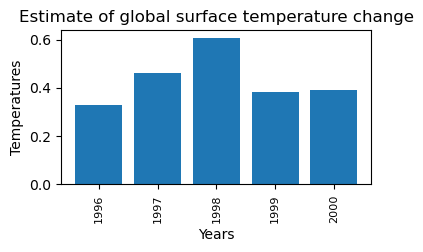

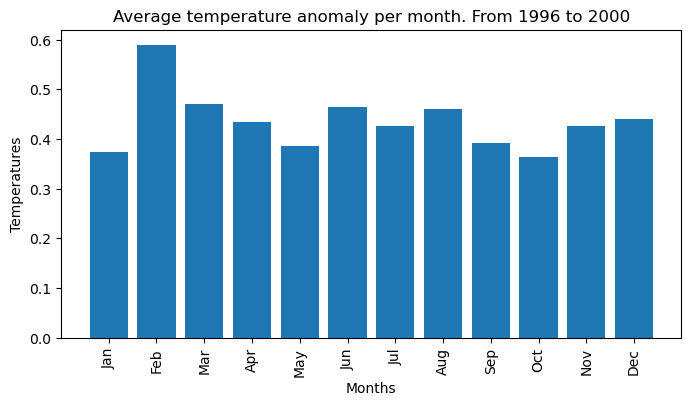

Sleeping for 5 seconds
Data produced: [{'Year': '2001', 'Jan': '.46', 'Feb': '.44', 'Mar': '.56', 'Apr': '.51', 'May': '.58', 'Jun': '.52', 'Jul': '.59', 'Aug': '.49', 'Sep': '.52', 'Oct': '.50', 'Nov': '.72', 'Dec': '.56', 'J-D': '.54', 'D-N': '.51', 'DJF': '.39', 'MAM': '.55', 'JJA': '.53', 'SON': '.58'}, {'Year': '2002', 'Jan': '.77', 'Feb': '.79', 'Mar': '.88', 'Apr': '.58', 'May': '.64', 'Jun': '.53', 'Jul': '.61', 'Aug': '.53', 'Sep': '.63', 'Oct': '.54', 'Nov': '.59', 'Dec': '.44', 'J-D': '.63', 'D-N': '.64', 'DJF': '.71', 'MAM': '.70', 'JJA': '.56', 'SON': '.58'}, {'Year': '2003', 'Jan': '.75', 'Feb': '.58', 'Mar': '.59', 'Apr': '.55', 'May': '.60', 'Jun': '.48', 'Jul': '.58', 'Aug': '.65', 'Sep': '.62', 'Oct': '.73', 'Nov': '.53', 'Dec': '.75', 'J-D': '.62', 'D-N': '.59', 'DJF': '.59', 'MAM': '.58', 'JJA': '.57', 'SON': '.62'}, {'Year': '2004', 'Jan': '.58', 'Feb': '.72', 'Mar': '.63', 'Apr': '.61', 'May': '.38', 'Jun': '.44', 'Jul': '.26', 'Aug': '.46', 'Sep': '.50', 'Oct': '

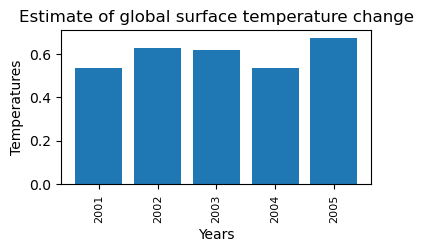

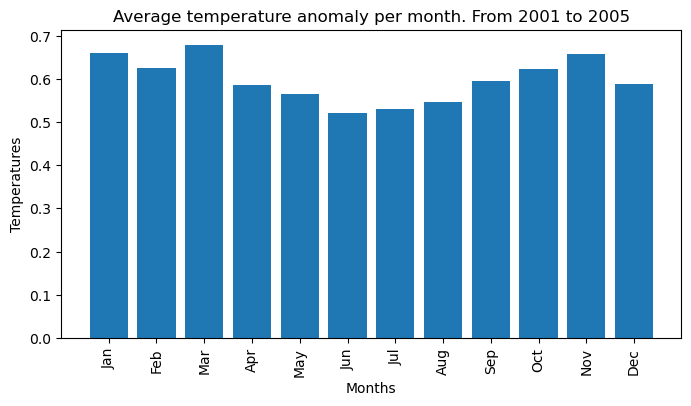

Sleeping for 5 seconds
Data produced: [{'Year': '2006', 'Jan': '.56', 'Feb': '.73', 'Mar': '.63', 'Apr': '.48', 'May': '.49', 'Jun': '.66', 'Jul': '.54', 'Aug': '.70', 'Sep': '.65', 'Oct': '.69', 'Nov': '.74', 'Dec': '.79', 'J-D': '.64', 'D-N': '.63', 'DJF': '.66', 'MAM': '.53', 'JJA': '.63', 'SON': '.69'}, {'Year': '2007', 'Jan': '1.02', 'Feb': '.70', 'Mar': '.73', 'Apr': '.76', 'May': '.69', 'Jun': '.61', 'Jul': '.60', 'Aug': '.60', 'Sep': '.60', 'Oct': '.58', 'Nov': '.58', 'Dec': '.49', 'J-D': '.66', 'D-N': '.69', 'DJF': '.84', 'MAM': '.73', 'JJA': '.60', 'SON': '.59'}, {'Year': '2008', 'Jan': '.30', 'Feb': '.38', 'Mar': '.74', 'Apr': '.54', 'May': '.49', 'Jun': '.49', 'Jul': '.60', 'Aug': '.47', 'Sep': '.61', 'Oct': '.67', 'Nov': '.69', 'Dec': '.54', 'J-D': '.54', 'D-N': '.54', 'DJF': '.39', 'MAM': '.59', 'JJA': '.52', 'SON': '.66'}, {'Year': '2009', 'Jan': '.65', 'Feb': '.53', 'Mar': '.54', 'Apr': '.61', 'May': '.65', 'Jun': '.65', 'Jul': '.73', 'Aug': '.68', 'Sep': '.72', 'Oct': 

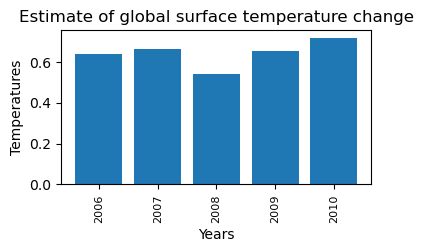

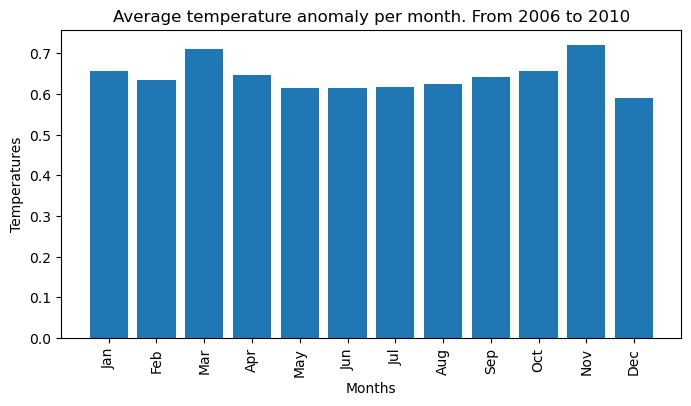

Sleeping for 5 seconds
Data produced: [{'Year': '2011', 'Jan': '.51', 'Feb': '.48', 'Mar': '.65', 'Apr': '.65', 'May': '.53', 'Jun': '.62', 'Jul': '.70', 'Aug': '.75', 'Sep': '.57', 'Oct': '.66', 'Nov': '.58', 'Dec': '.60', 'J-D': '.61', 'D-N': '.60', 'DJF': '.48', 'MAM': '.61', 'JJA': '.69', 'SON': '.60'}, {'Year': '2012', 'Jan': '.49', 'Feb': '.49', 'Mar': '.58', 'Apr': '.72', 'May': '.78', 'Jun': '.64', 'Jul': '.58', 'Aug': '.65', 'Sep': '.72', 'Oct': '.79', 'Nov': '.78', 'Dec': '.53', 'J-D': '.65', 'D-N': '.65', 'DJF': '.53', 'MAM': '.70', 'JJA': '.63', 'SON': '.77'}, {'Year': '2013', 'Jan': '.70', 'Feb': '.62', 'Mar': '.67', 'Apr': '.54', 'May': '.61', 'Jun': '.69', 'Jul': '.60', 'Aug': '.69', 'Sep': '.77', 'Oct': '.69', 'Nov': '.84', 'Dec': '.70', 'J-D': '.68', 'D-N': '.66', 'DJF': '.62', 'MAM': '.61', 'JJA': '.66', 'SON': '.77'}, {'Year': '2014', 'Jan': '.75', 'Feb': '.55', 'Mar': '.78', 'Apr': '.80', 'May': '.86', 'Jun': '.67', 'Jul': '.58', 'Aug': '.83', 'Sep': '.88', 'Oct': '

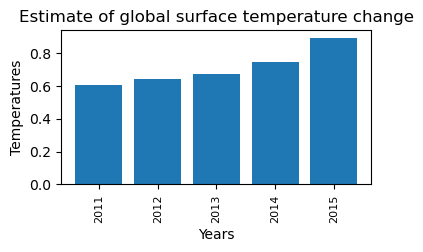

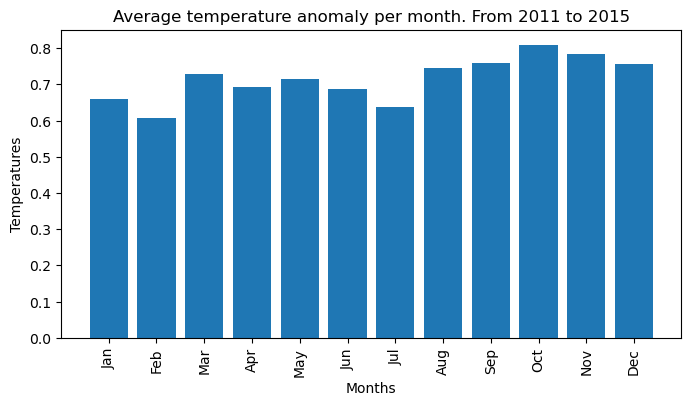

Sleeping for 5 seconds
Data produced: [{'Year': '2016', 'Jan': '1.17', 'Feb': '1.37', 'Mar': '1.36', 'Apr': '1.11', 'May': '.95', 'Jun': '.80', 'Jul': '.85', 'Aug': '1.02', 'Sep': '.90', 'Oct': '.89', 'Nov': '.92', 'Dec': '.87', 'J-D': '1.02', 'D-N': '1.04', 'DJF': '1.23', 'MAM': '1.14', 'JJA': '.89', 'SON': '.90'}, {'Year': '2017', 'Jan': '1.02', 'Feb': '1.14', 'Mar': '1.17', 'Apr': '.94', 'May': '.91', 'Jun': '.72', 'Jul': '.82', 'Aug': '.87', 'Sep': '.77', 'Oct': '.90', 'Nov': '.88', 'Dec': '.94', 'J-D': '.92', 'D-N': '.92', 'DJF': '1.01', 'MAM': '1.01', 'JJA': '.80', 'SON': '.85'}, {'Year': '2018', 'Jan': '.81', 'Feb': '.85', 'Mar': '.89', 'Apr': '.88', 'May': '.83', 'Jun': '.78', 'Jul': '.83', 'Aug': '.77', 'Sep': '.80', 'Oct': '1.02', 'Nov': '.83', 'Dec': '.92', 'J-D': '.85', 'D-N': '.85', 'DJF': '.87', 'MAM': '.87', 'JJA': '.79', 'SON': '.88'}, {'Year': '2019', 'Jan': '.93', 'Feb': '.95', 'Mar': '1.18', 'Apr': '1.01', 'May': '.85', 'Jun': '.91', 'Jul': '.94', 'Aug': '.95', 'Sep'

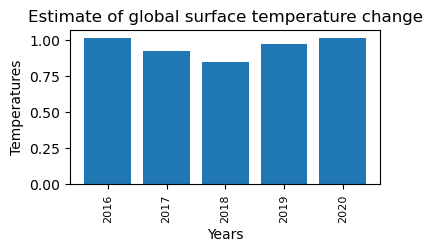

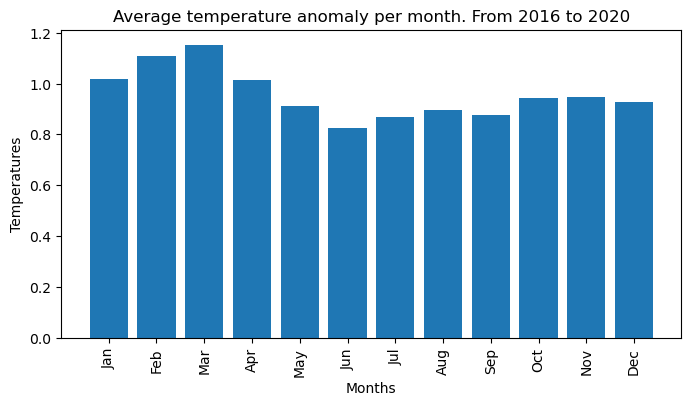

Sleeping for 5 seconds
Data produced: [{'Year': '2021', 'Jan': '.82', 'Feb': '.65', 'Mar': '.89', 'Apr': '.76', 'May': '.79', 'Jun': '.85', 'Jul': '.93', 'Aug': '.81', 'Sep': '.92', 'Oct': '.99', 'Nov': '.93', 'Dec': '.86', 'J-D': '.85', 'D-N': '.85', 'DJF': '.76', 'MAM': '.81', 'JJA': '.86', 'SON': '.95'}]
Notifiying consumers...


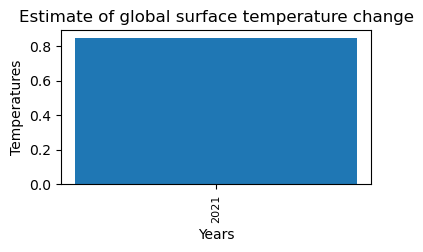

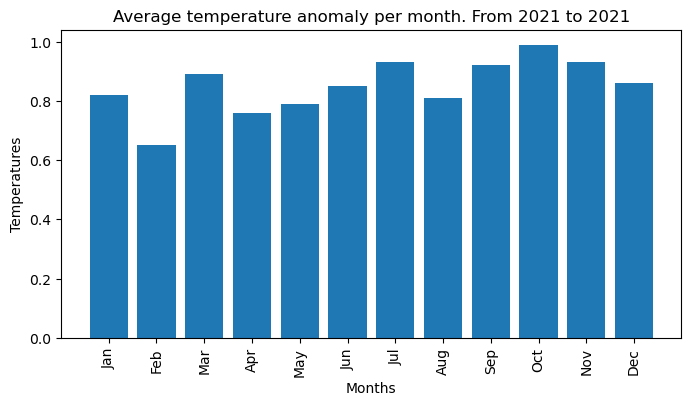

Sleeping for 5 seconds


In [53]:
# def main():
# from publisher import Reader
# from consumers import AverageYear(), AverageMonth()

producer = Reader('./data/dSST.csv')
consumer1 = AverageYear()
consumer2 = AverageMonth()
producer.add_observer(consumer1)
producer.add_observer(consumer2)
producer.produce_data()

# if __name__=='__main__':
#     main()


This design of different classes and different files make the codes and solutions reusable. 
  
This design defines a one to many relationship between object. The **Reader** allows the notificacion of the observers (**AverageYear** and **Average Month**) when the information of the reader has change. That is that the Reader consumes the data and gets the next 5 lines of data from the **CsvConverter**.

This design ***separates*** the observer objects and keeps the objects ***flexible*** between them. The code is ***modular*** and ***easy to matain***. This structure allows the data ***synchronization*** and the ***notification***  of several objects at the same time when the data from the Reader is ***modified***. 

##### **Possible problems of the Observer Design Pattern**  

The design could be improved to makes the classes ***reusable***, specifically the observers. The only thing they can do is get the average of the temperature by month or year, if we wanted to do something else with the new data produce with from the ```Reader``` a totally new consumer class would be needed.  
  
This Observer Design Pattern is ***useful for relatively small amounts of data***, as every time the ```Reader``` class is called a ```CsvConverter``` object is created and then the observers are notified. This whole process is manageable because there are only 2 observers and the data is being updated 10 times. If we wanted to notify more observers or if the data lines in the weather file were more`, this design would not be optimal. 